In [2]:
def two_pass(img):
    cls = np.zeros(img.shape,dtype=np.int32)
    #1st pass
    neig = []
    c = 0
    if img[0,0]==0:
        cls[0,0] = 0
    else:
        cls[0,0] = 1
        c = 1
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if i==0:
                if j!=0:
                    if img[i,j]==1 and img[i,j-1]==1:
                        cls[i,j] = cls[i,j-1]
                    elif img[i,j]==1:
                        cls[i,j] = c+1
                        c+=1
            else:
                if img[i,j]==1 and img[i-1,j]==1:
                    cls[i,j] = cls[i-1,j]
                    if j>0 and img[i,j-1]==1:
                        cls[i,j] = np.min(np.array([cls[i-1,j],cls[i,j-1]]))
                        if cls[i-1,j]!=cls[i,j-1]:
                            neig.append(cls[i-1,j])
                            neig.append(cls[i,j-1])
                elif img[i,j]==1 and j>0 and img[i,j-1]==1:
                    cls[i,j] = cls[i,j-1]
                elif img[i,j]==1:
                    cls[i,j] = c+1
                    c+=1
                    
    #calculate the neigbourhood
    arr = np.arange(c+1)
    
    for i in range(len(neig)//2):
        j = min(neig[2*i],neig[2*i+1])
        k = max(neig[2*i],neig[2*i+1])
        arr[k] = j
    
    for i in range(c+1):
        j = arr[i]
        k = i
        while j!=k:
            k = j
            j = arr[j]
        arr[i] = j
    out = cls.copy()
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            out[i,j] = arr[cls[i,j]]
    
#     u = np.unique(cls)
    return out

## 4.1

In [3]:
_,img = cv2.threshold(cv2.cvtColor(cv2.imread('../images/objects.png'),cv2.COLOR_BGR2GRAY),127,255,cv2.THRESH_BINARY)

cls = two_pass(img//255)
arr = np.unique(cls)

img_inv = 255 - img
    #get the holes
cls_inv = two_pass(img_inv//255)
arr_inv = np.unique(cls_inv)
arr_inv = arr_inv[2:]

ind = np.zeros(arr_inv.size)

#get the label of the connected component of the object surrounding each hole
for i in range(arr_inv.size):
    a = np.where(cls_inv==arr_inv[i])
    k = a[0][0]
    l = a[1][0]
    ind[i] = cls[k-1,l]

#count the unique
c = np.unique(ind).size
print("no. of objects with atleat one hole is ",c)

no. of objects with atleat one hole is  6


## 4.2

In [4]:
_,img = cv2.threshold(cv2.cvtColor(cv2.imread('../images/objects.png'),cv2.COLOR_BGR2GRAY),127,255,cv2.THRESH_BINARY)

cls = two_pass(img//255)
arr = np.unique(cls)
arr = arr[1:]
count=0
for i in range(arr.size):
    a = np.where(cls==arr[i])
    k1 = np.min(a[0])
    l1 = np.min(a[1])
    k2 = np.max(a[0])
    l2 = np.max(a[1])
    squ = True

    for k in range(k1,k2):
        if img[k,l1]==0 or img[k,l2]==0:
            squ = False
    if squ==False:
        continue
    for l in range(l1,l2):
        if img[k1,l]==0 or img[k2,l]==0:
            squ = False
    if squ==False:
        continue
    count+=1
print("no. of square objects in the image are ",count)

no. of square objects in the image are  11


## 4.3

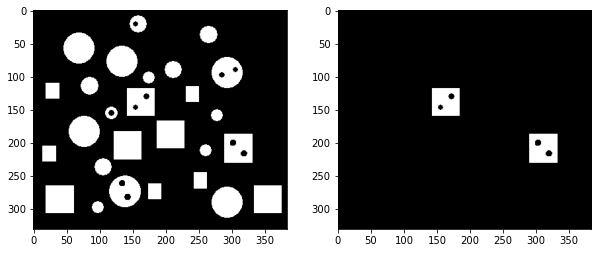

In [5]:
_,img = cv2.threshold(cv2.cvtColor(cv2.imread('../images/objects.png'),cv2.COLOR_BGR2GRAY),127,255,cv2.THRESH_BINARY)

cls = two_pass(img//255)
arr = np.unique(cls)
arr = arr[1:]
cls_inv = two_pass(img_inv//255)
arr_inv = np.unique(cls_inv)
arr_inv = arr_inv[2:]

ind = np.zeros(arr_inv.size)

#get the label of the connected component of the object surrounding each hole
for i in range(arr_inv.size):
    a = np.where(cls_inv==arr_inv[i])
    k = a[0][0]
    l = a[1][0]
    ind[i] = cls[k-1,l]

arr = np.unique(ind)
ind = np.zeros(arr.size)
for i in range(arr.size):
    a = np.where(cls==arr[i])
    k1 = np.min(a[0])
    l1 = np.min(a[1])
    k2 = np.max(a[0])
    l2 = np.max(a[1])
    squ = True
    
    for k in range(k1,k2):
        if img[k,l1]==0 or img[k,l2]==0:
            squ = False
    if squ==False:
        ind[i] = 0
        continue
    for l in range(l1,l2):
        if img[k1,l]==0 or img[k2,l]==0:
            ind[i] = 0
            squ = False
    if squ==False:
        ind[i] = 0
        continue
    ind[i] = 1

out = np.zeros(img.shape,dtype=np.uint8)
for i in range(arr.size):
    if ind[i]==1:
        out[cls==arr[i]] = 1
        
fig = plt.figure()
fig.set_size_inches(10, 10)
plt.imshow(out)
fig.add_subplot(121)
plt.imshow(img,'gray')
plt.subplot(1,2,2)
plt.imshow(out,'gray')
plt.show()

## 4.4


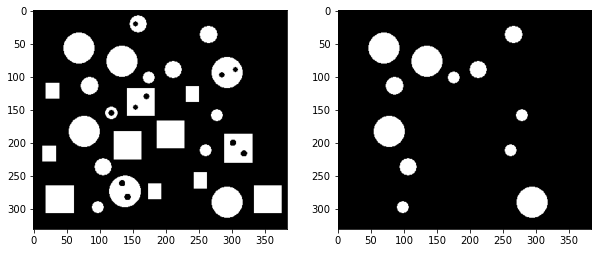

In [6]:
_,img = cv2.threshold(cv2.cvtColor(cv2.imread('../images/objects.png'),cv2.COLOR_BGR2GRAY),127,255,cv2.THRESH_BINARY)
out = img//255
img_inv = 255 - img
cls = two_pass(img//255)
arr = np.unique(cls)
arr = arr[1:]
cls_inv = two_pass(img_inv//255)
arr_inv = np.unique(cls_inv)
arr_inv = arr_inv[2:]


#get the label of the connected component of the object surrounding each hole
for i in range(arr_inv.size):
    a = np.where(cls_inv==arr_inv[i])
    k = a[0][0]
    k1 = a[0][-1]
    l = a[1][0]
    out[cls==cls[k-1,l]] = 0
    
ind = np.zeros(arr.size)
for i in range(arr.size):
    a = np.where(cls==arr[i])
    k1 = np.min(a[0])
    l1 = np.min(a[1])
    k2 = np.max(a[0])
    l2 = np.max(a[1])
    squ = True
    
    for k in range(k1,k2):
        if img[k,l1]==0 or img[k,l2]==0:
            squ = False
    if squ==False:
        ind[i] = 0
        continue
    for l in range(l1,l2):
        if img[k1,l]==0 or img[k2,l]==0:
            ind[i] = 0
            squ = False
    if squ==False:
        ind[i] = 0
        continue
    ind[i] = 1


for i in range(arr.size):
    if ind[i]==1:
        out[cls==arr[i]] = 0
        
fig = plt.figure()
fig.set_size_inches(10, 10)
plt.imshow(out)
fig.add_subplot(121)
plt.imshow(img,'gray')
plt.subplot(1,2,2)
plt.imshow(out,'gray')
plt.show()